# Worksheet 18

Name: Sai Tejaswini Junnuri 
UID: U92492167

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

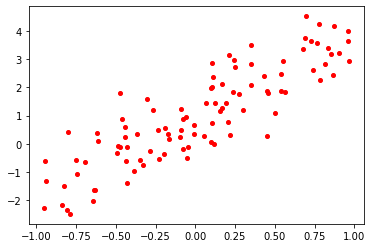

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

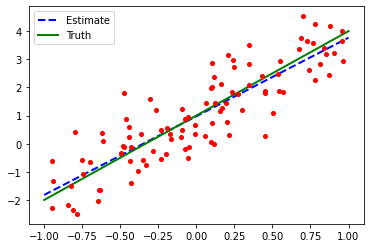

In [2]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The slight differences between the estimated parameters and the true parameters are due to the random noise added to the data when generating the y values. This is expected behavior in linear regression, given y is a linear estimate of x, and the estimates can vary with each run due to the randomness of the noise. However, the estimates should generally be close to the true parameters, as seen in this case.​

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

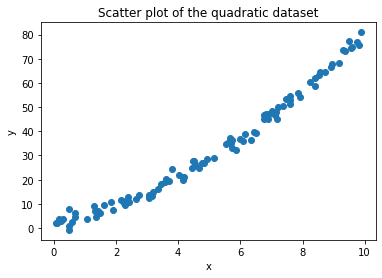

In [9]:
# Number of points
n = 100

# Generate random X values
x = np.random.rand(n) * 10

# Generate Y values based on the given quadratic formula
eps = np.random.randn(n) * 2  # Random noise with a standard deviation of 2
y = 1 + 3 * x + 0.5 * x**2 + eps

# Plotting the dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the quadratic dataset')
plt.show()

e) Plot the least squares estimate line through the scatter plot.

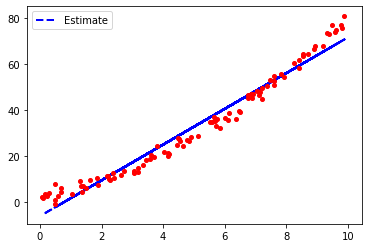

In [10]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.random.rand(n) * 10
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

Since that data cannot be fit into a linear equation, the beta parameters are far off

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

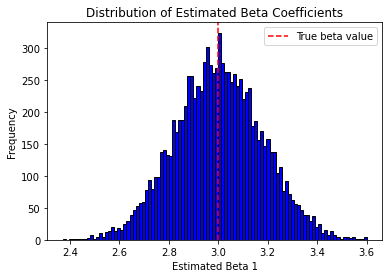

In [11]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
betas = []

# The true_beta should include the coefficient for the X^2 term as well
true_beta = np.array([1, 3, 0.5])  # Assuming the true model is Y = 1 + 3*X + 0.5*X^2

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    # Adding the quadratic term and noise to y
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
    
    # Assuming xlin refers to the linear component of x
    xlin = x
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin, xlin**2]).T  # Adding a column for x^2
    
    # Performing the linear regression using the normal equation
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

# Plotting the histogram of the estimated linear coefficients (ignoring the quadratic term)
plt.hist(np.array(betas)[:, 1], bins=100, color='blue', edgecolor='black')
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True beta value')
plt.legend()
plt.title('Distribution of Estimated Beta Coefficients')
plt.xlabel('Estimated Beta 1')
plt.ylabel('Frequency')
plt.show()
